##Principal Component Analysis (PCA) 
##AND Singular Value Decomposition (SVD)

Before we look at the math, which is a bit tedious, the first thing to note is that these techniques are used for unsupervised problems.  Occasionally, we will use the techniques to create a new feature space in linear or logistic regression in the case that our original feature space is very large; however, we then lose the interpretability of our usually very easy to interpret linear models.  These techniques have also been used to do survey analysis, analyze for recommendation systems, and perform a number of other analyses to difficult statistical problems including image facial recognition and natural language processing. 

In a technique known as PCR (Principal Component Regression), PCA is designed to create a new set of predictors that are a linear combination of the original predictors.  Nicely enough, PCA assures that our new features (or columns) are linearly independent (or orthogonal) to one another - one of our assumputions in multiple linear regression was exactly this - no multicollinearity. 

It is important to have a basic idea about the math that is considered for PCA/SVD, so that we know a little bit about the results that occur and how we can use them to understand our data.  If you have a square matrix, then it follows that the eignevalues and eignevectors of the matrix A can be found for all non-zero, eigenvalue solutions for $\lambda$ as:

$$Av = \lambda v$$

where A is our matrix of original data (or our covariance matrix for some set of problems - ["By finding the eigenvalues and eigenvectors of the covariance matrix, we find that the eigenvectors with the largest eigenvalues correspond to the dimensions that have the strongest correlation in the dataset"](http://www.cse.psu.edu/~rtc12/CSE586Spring2010/lectures/pcaLectureShort_6pp.pdf)), $\lambda$ is our eigenvalue, and v is our eigenvector.  For any $\lambda$, we have a corresponding v that meets the above criteria.  Our vector, v, is known as an eigenvector, and our $\lambda$ value is known as the corresponding eigenvalue.  However, if our matrix is not square, then we must use singular value decomposition (SVD) to find our eigenvalues and corresponding eigenvectors.  When we are not finding the eigenvalues and eigenvectors of variance-covariance matrix in data science, our matrix for which we would like to find the eigenvalues and eigenvectors is *not* square. 

On a technical note, eigenvalues and eigenvectors for our non-square matrix do not exist. SVD allows us to find the corollary to eigenvalues and eigenvectors for our non-square matrix, which finds an optimization for a square matrix that will lead to the components with maximum variability to be explained in our original matrix, as explained in the first comment [Here](http://math.stackexchange.com/questions/583938/do-non-square-matrices-have-eigenvalues). Instead of finding eigenvalues and eigenvectors directly, we find the singular values and singular vectors of our original matrix.

I will talk through a little bit of the math of SVD before diving into an example and interpretting results.  Using SVD involves decomposing our original $X_{n x p}$ matrix into the following components:

$$X_{n x p} = U_{n x n} \Sigma_{n x p} V'_{p x p}$$


$$X = U \Sigma V'$$

such that $\Sigma$ is a non-negative diagonal matrix with the square root of our eigenvalues as those diagonal elements placed in descending order.  [Here](http://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca) is a link discussing the relationship between PCA and SVD.  

The principal components provided by software using SVD can be found as the eigenvectors of $X'X$, which are also the columns of $U$.  Alternatively, the eigenvectors of $XX'$ can be found as the columns of $V$, as described [here](http://web.mit.edu/be.400/www/SVD/Singular_Value_Decomposition.htm).  Note, we will want to at least perform centering of our $X$ matrix before calculating the above.  However, it is common to perform a complete normalization of our $X$ matrix.

One thing to point out is the similarity between the PCA algorithm and the SVD algorithm, as these prove to be essentially the same task, where SVD is finding all combinations of eigenvalue-eigenvector pairs when A is non-symmetric.  Notice, since $\lambda$ is a scalar in the following:

$$A v = \lambda v$$

I can move it to either side of v with no change to the right side of the equation.  Consider a matrix of $\sqrt{\lambda}$ values on the diagonals, and 0's on the off-diagonals for our matrix $\Sigma$.  We then are looking to decompose A, such that $A = V \Sigma V'$.  In PCA, the solution to this equation can be found explicitly using 

$$det(A - I\lambda) = 0$$

to give a combination of the rows of $V$ multiplied by the columns of $\Sigma$ multiplied by the columns of $V'$ will provide our original matrix A.  Here $V$ is our orthogonal matrix of linear combinations of the original matrix $A$, and $\Sigma$ holds on the diagonal the square root of our eigenvalues.  In SVD, we have a similar situation, but since $A$ is non-symmetric, we are attempting to find two orthogonal matrices $U$ and $V$ ($U$ is row orthogonal, and $V$ is column orthogonal) that will provide our non-square original matrix $X$.  There is a two part iterative method for finding the converging values of each matrix, which can be found: [Here](https://en.wikipedia.org/wiki/Singular_value_decomposition).  


SVD is used across multiple applications.  The lecture notes discuss this method as used in recommendation systems.  However, it can also be used for a range of activities.  I have personally used it for survey analysis.  I will show an example of how to use it to subset your original feature space.  Needless to say - it is a useful method across multiple disciplines.  


##Interpretation of the Results

The most important part of PCA or SVD is to understand how we can use the results.  The main interpretations to understand are:

* Squaring the diagonal elements of $\Sigma$ gives us the eigenvalues.  Eigenvalues are useful, as they provide to us the amount of variability in the original space of $X$ that can be explained by the linear combination of our matrix with the eigenvector associated with that particular eigenvalue.  


* As provided above, each eigenvalue has an associated eigenvector.  The eigenvector gives us a linear combination of the original columns that can be used to create a new column.  The amount of variability in the original columns that can be captured by simply using this new column is the value provided by the eigenvector (this is basically the same as the above point, but stresses the importance of eigenvalues and eigenvectors).  


* The individual components (elements) of an eigenvector are often called the 'weights'.  They provide to us the importance of each original column in creating the new column as discussed in point two.  

Examples extending from class activities:

* Consider we want to reduce the number of predictor variables we use in a linear regression model, but still account for 90% of the variability of our original feature space (with the idea being that the features that are most variable will help us best account for the variability in the response).  We can do PCA and find out a set of new predictor variables that will account for this amount of variability that are also linearly independent columns.  Unfortunately, we lose interpretability by centering our data, as well as creating linear combinations of our original features.  


* Consider we want to reduce the number of questions on a survey, but keep the questions that are best at capturing the largest variability in customer responses.  We also want to know which questions seem to be most associated with one another.  In survey analysis, each component is generally indicative of a set of questions that are aimed at a particular topic.  The weights of each column tell us the importance of each question to that particular topic.  The eigenvalue provides to us the amount of variability in all responses across all questions that can be explained by that particular component of the survey.  This can help us reduce the total number of questions on our survey while still capturing all the necessary information from our consumers.


##PCA and SVD using Python

A basic introduction to principal component analysis using Python.  Here, we will simply look at the main output you obtain from running a PCA and how you should interpret these results.  A very strong example of all of the steps incorporated with doing PCA can be found [Here](http://sebastianraschka.com/Articles/2014_pca_step_by_step.html).  I will be showing how to use the 'built in' functions to get results, and then I will focus on an interpretation of these results. 

First, let's get started with our libraries and using some data.

In [23]:
from sklearn import decomposition
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.stats.outliers_influence as sm_o
import seaborn as sb 
import numpy as np
%matplotlib inline

In [11]:
boston = pd.DataFrame(datasets.load_boston()['data'])
boston.columns = datasets.load_boston()['feature_names']
boston_target = datasets.load_boston()['target']
#datasets.load_boston()['DESCR']

In [12]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [13]:
boston.shape

(506, 13)

I am going to normalize our X matrix.  Note, without normalizing certain features will outweigh others simply because of the units.  We want to know which features have the maximum variability after accounting for the units, as we hope that the features with the most variability will be able to attribute for the variability in our response in PCR. In unsupervised approaches we want new features that can be associated with the most variability in the original feature space because it will allow us to reduce to the fewest number of new features that can still help us understand as much as possible about the original features.

In [14]:
bost_norm = (boston - boston.mean()) / (boston.std())

We can then use the following code to perform PCA on our dataframe, as well as find the percent of variability explained by each component.

In [30]:
pca = decomposition.PCA()
pca.fit(bost_norm);

Now, we can find the amount of variability explained by any individual, new component (a linear combination of our original components) as:

In [43]:
eigenvalues = pca.explained_variance_/sum(pca.explained_variance_);

The linear combination of our original components needed to create the new component can be found within the following:

In [44]:
components = pca.components_;

In [45]:
np.cumsum(eigenvalues)

array([ 0.47097344,  0.58113216,  0.67660624,  0.74259077,  0.80678817,
        0.85753052,  0.8989934 ,  0.9294968 ,  0.95083795,  0.96778101,
        0.98210131,  0.99511419,  1.        ])

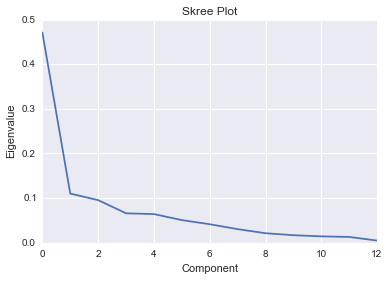

In [50]:
plt.plot(eigenvalues);
plt.title('Skree Plot');
plt.xlabel('Component');
plt.ylabel('Eigenvalue');